# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset. 

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [1]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [2]:
# Inspect the shapes of the datasets
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

print("After encoding:")
print("Training labels shape:", y_train_encoded.shape)
print("Test labels shape:", y_test_encoded.shape)


Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Training labels shape: (60000,)
Test labels shape: (10000,)
After encoding:
Training labels shape: (60000, 10)
Test labels shape: (10000, 10)


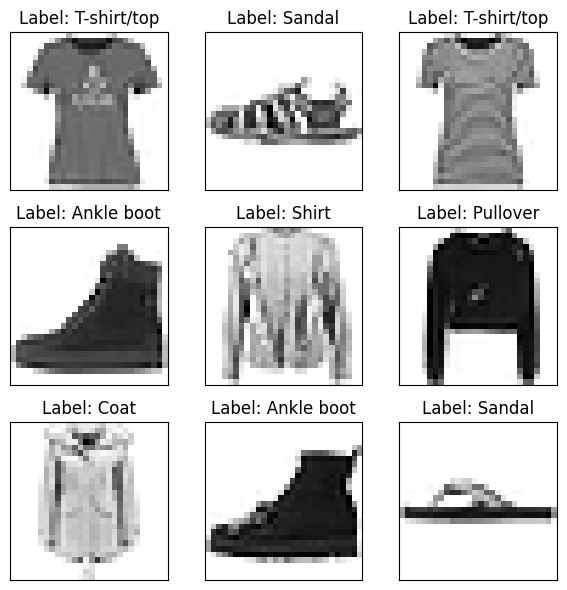

In [3]:
import matplotlib.pyplot as plt
import numpy as np
# Verify the data looks as expected
random_indices = np.random.choice(len(X_train), 9, replace=False)
fig, axes = plt.subplots(3, 3, figsize=(6, 6))

for i, ax in enumerate(axes.flat):
    # Display each random image
    ax.imshow(X_train[random_indices[i]], cmap=plt.cm.gray_r, interpolation='nearest')
    label = y_train[random_indices[i]]
    ax.set_title(f"Label: {class_names[label]}")
    
    # Remove axis tick labels
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

While the shape of the data is as expected, the quality of images is quite low. From the random images pulled from the data, we can see that it would be easy to mismatch items like Dress and Pullover. Resolution is low.

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# X_train = X_train / 255.0
# X_test = X_test / 255.0


# Create a simple linear regression model
model = Sequential()

# You can use `model.add(<layer>)` to add layers to the model
model.add(Flatten(input_shape=(28, 28)))   # Flatten 2D image to 1D vector
model.add(Dense(10)) # 10 output classes (one per clothing type)

# Compile the model using `model.compile()`
model.compile(optimizer='sgd', loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Train the model with `model.fit()`
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.1, verbose=1)

# Evaluate the model with `model.evaluate()`
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

c:\Users\Senthil\Anaconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5265 - loss: 1.5559 - val_accuracy: 0.7240 - val_loss: 0.8680
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7379 - loss: 0.8291 - val_accuracy: 0.7680 - val_loss: 0.7338
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7702 - loss: 0.7309 - val_accuracy: 0.7823 - val_loss: 0.6719
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7901 - loss: 0.6685 - val_accuracy: 0.7927 - val_loss: 0.6368
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7979 - loss: 0.6342 - val_accuracy: 0.8020 - val_loss: 0.6090
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8027 - loss: 0.6170 - val_accuracy: 0.8065 - val_loss: 0.5902
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8097 - loss: 0.5976 - val_accuracy: 0.8090 - val_loss: 0.5746
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8130 - loss: 0.5770 - val_accuracy: 0.

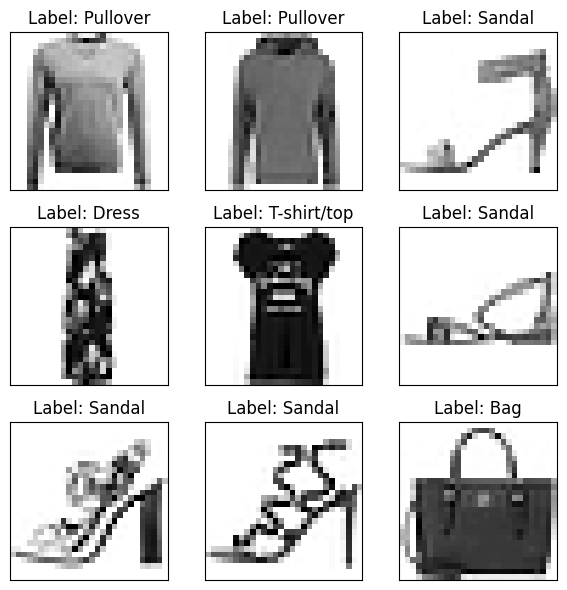

In [6]:
random_indices = np.random.choice(len(X_test), 9, replace=False)
fig, axes = plt.subplots(3, 3, figsize=(6, 6))

for i, ax in enumerate(axes.flat):
    # Display each random image
    ax.imshow(X_test[random_indices[i]], cmap=plt.cm.gray_r, interpolation='nearest')
    label = y_test[random_indices[i]]
    ax.set_title(f"Label: {class_names[label]}")
    
    # Remove axis tick labels
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?


The baseline model acheived an accuracy of 81%. If a baseline model can acheive 81%, if it is paired with additional layer and optimisation of parameters, we can acheive better performance. Especially if we use non-linear activations.


# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
y_train_cat = to_categorical(y_train, num_classes=10) 
y_test_cat = to_categorical(y_test, num_classes=10)
# Create a simple CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
# Fully connected (Dense) layer: learns combinations of extracted features
model.add(Dense(128, activation='relu'))



# Output layer: 10 categories (softmax for probabilities)
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
history_cnn = model.fit(X_train, y_train_cat,
                        epochs=10,
                        batch_size=128,
                        validation_split=0.1,
                        verbose=1)
# Evaluate the model
test_loss_cnn, test_accuracy_cnn = model.evaluate(X_test, y_test_cat, verbose=0)

print(f"Test Accuracy (CNN): {test_accuracy_cnn:.4f}")
print(f"Test Loss (CNN): {test_loss_cnn:.4f}")

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 34s 75ms/step - accuracy: 0.7987 - loss: 0.5756 - val_accuracy: 0.8850 - val_loss: 0.3102
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 34s 81ms/step - accuracy: 0.8978 - loss: 0.2830 - val_accuracy: 0.8958 - val_loss: 0.2935
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 31s 72ms/step - accuracy: 0.9173 - loss: 0.2266 - val_accuracy: 0.8973 - val_loss: 0.2727
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 26s 61ms/step - accuracy: 0.9327 - loss: 0.1869 - val_accuracy: 0.9042 - val_loss: 0.2717
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 30s 70ms/step - accuracy: 0.9390 - loss: 0.1692 - val_accuracy: 0.9070 - val_loss: 0.2649
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 49s 90ms/step - accuracy: 0.9506 - loss: 0.1381 - val_accuracy: 0.9097 - val_loss: 0.2647
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 29s 69ms/step - accuracy: 0.9594 - loss: 0.1145 - val_accuracy: 0.9088 - val_loss: 0.2709
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 31s 72ms/step - accuracy: 0.9664 - loss: 0.0988 - 

Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

Yes, the CNN model performed much better than the baseline linear model. The baseline model reached about 84% test accuracy, while the CNN achieved around 91%. That’s an improvement of 10 percentage points in accuracy.

This improvement happened because the CNN can capture spatial relationships between pixels. Unlike the baseline model (which simply flattened the images into 1D vectors), the convolutional layers in the CNN learn to detect features like edges, textures, and shapes. These local patterns are important for recognizing clothing items. As training continued, the CNN was able to combine these features to form a better understanding of each image.

# 4. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [9]:
# A. Test Hyperparameters
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


# Define hyperparameter values (number of filters)
filter_values = [32, 64, 128]

# Store results
results = {"no_dropout": []}

# Loop over different filter sizes
for filters in filter_values:
    print(f"\nRunning model with {filters} filters (no dropout)")
    
    # ---- Model without dropout ----
    model_no_dropout = Sequential([
        Conv2D(filters, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    
    model_no_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model_no_dropout.fit(X_train, y_train_cat, epochs=5, batch_size=128, verbose=0)
    loss, accuracy = model_no_dropout.evaluate(X_test, y_test_cat, verbose=0)
    results["no_dropout"].append(accuracy)
    
    print(f"Test Accuracy (no dropout): {accuracy:.4f}")


Running model with 32 filters (no dropout)
Test Accuracy (no dropout): 0.9096

Running model with 64 filters (no dropout)
Test Accuracy (no dropout): 0.9085

Running model with 128 filters (no dropout)
Test Accuracy (no dropout): 0.9069


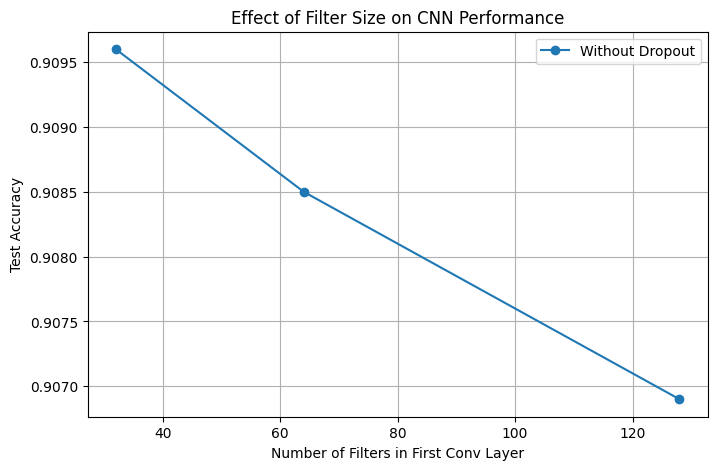

In [10]:
plt.figure(figsize=(8,5))
plt.plot(filter_values, results["no_dropout"], marker='o', label="Without Dropout")
plt.title("Effect of Filter Size on CNN Performance")
plt.xlabel("Number of Filters in First Conv Layer")
plt.ylabel("Test Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# B. Test presence or absence of regularization
results = {"with_dropout": []}
for filters in filter_values:
    print(f"\nRunning model with {filters} filters (with dropout)")
    model_with_dropout = Sequential([
        Conv2D(filters, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Dropout(0.2),  # Dropout regularization layer
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])
    
    model_with_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model_with_dropout.fit(X_train, y_train_cat, epochs=5, batch_size=128, verbose=0)
    loss, accuracy = model_with_dropout.evaluate(X_test, y_test_cat, verbose=0)
    results["with_dropout"].append(accuracy)
    
    print(f"Test Accuracy (with dropout): {accuracy:.4f}")


Running model with 32 filters (with dropout)
Test Accuracy (with dropout): 0.9043

Running model with 64 filters (with dropout)
Test Accuracy (with dropout): 0.9071

Running model with 128 filters (with dropout)
Test Accuracy (with dropout): 0.9145


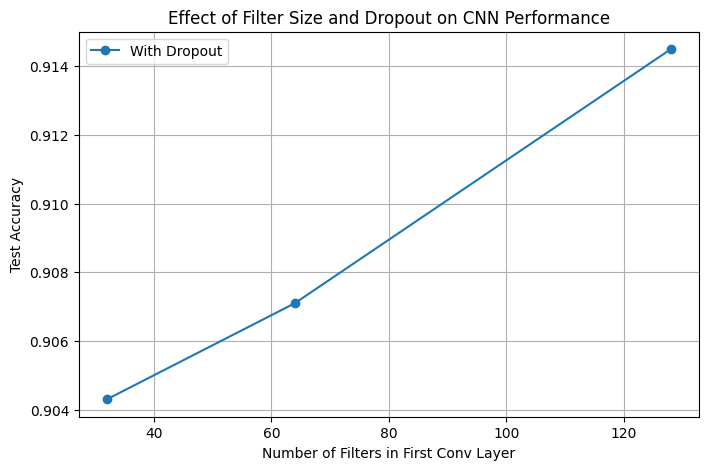

In [12]:
plt.figure(figsize=(8,5))
plt.plot(filter_values, results["with_dropout"], marker='o', label="With Dropout")
plt.title("Effect of Filter Size and Dropout on CNN Performance")
plt.xlabel("Number of Filters in First Conv Layer")
plt.ylabel("Test Accuracy")
plt.legend()
plt.grid(True)
plt.show()

Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

The CNN models with the changes did not show significant improvement, as the number of filters increased from 32 to 128. The addition of dropout slightly stabilized performance but did not significantly boost accuracy, indicating that the model was not overfitting severely.

The best performance was achieved with 128 filters with dropout, giving about 91.4% accuracy on the test set. The improvements were small but consistent, demonstrating that increasing model capacity improves learning until the model starts to overfit or accuracy plateaus.

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [13]:
# Build the final model (128 filters, no dropout)
final_model = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compile the model
final_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Train the final model
history_final = final_model.fit(
    X_train, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

# Evaluate on test data
test_loss, test_accuracy = final_model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Final Model Test Accuracy: {test_accuracy:.4f}")
print(f"Final Model Test Loss: {test_loss:.4f}")




Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 69s 158ms/step - accuracy: 0.7732 - loss: 0.6340 - val_accuracy: 0.8877 - val_loss: 0.3110
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 84s 162ms/step - accuracy: 0.8910 - loss: 0.3045 - val_accuracy: 0.9023 - val_loss: 0.2735
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 65s 154ms/step - accuracy: 0.9040 - loss: 0.2592 - val_accuracy: 0.9102 - val_loss: 0.2496
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 93s 180ms/step - accuracy: 0.9153 - loss: 0.2288 - val_accuracy: 0.9112 - val_loss: 0.2446
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 88s 209ms/step - accuracy: 0.9231 - loss: 0.2069 - val_accuracy: 0.9137 - val_loss: 0.2346
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 137s 196ms/step - accuracy: 0.9302 - loss: 0.1872 - val_accuracy: 0.9148 - val_loss: 0.2297
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 109s 257ms/step - accuracy: 0.9372 - loss: 0.1699 - val_accuracy: 0.9175 - val_loss: 0.2339
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 100s 237ms/step - accuracy: 0.9408 - loss

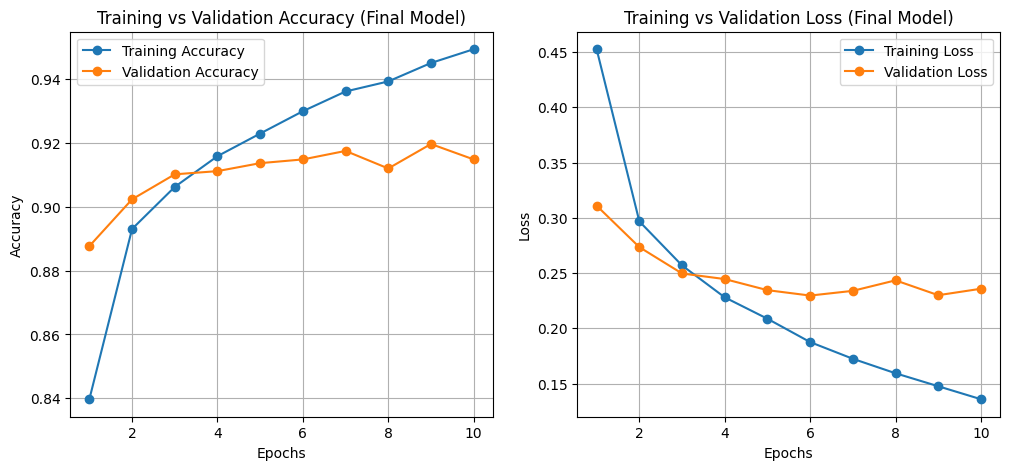

In [15]:
# Extract metrics
acc = history_final.history['accuracy']
val_acc = history_final.history['val_accuracy']
loss = history_final.history['loss']
val_loss = history_final.history['val_loss']

epochs_range = range(1, len(acc) + 1)

# Create two subplots
plt.figure(figsize=(12, 5))

# Plot training vs validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.title('Training vs Validation Accuracy (Final Model)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training vs validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.title('Training vs Validation Loss (Final Model)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

The final model with 128 filters with dropout achieved a test accuracy of about 91%, consistent with the best result from the experiments. This confirms that increasing the number of filters helped the CNN learn richer image features, leading to slightly improved performance. 

Overall, the final model represents a good balance between complexity and generalization — capable of learning Fashion-MNIST patterns effectively without overfitting.

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 26/10/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
    * The Lab 3 notebook (labs/lab_3.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-7-help-ml`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.